## **Demo Notebook for using Metrica Sports Data**

### 1. Read and Process Data

In [ ]:
from ligafooty.data_processor.metrica import MetricaTrackingDataProcessor

home_team_file = r"Sample_Game_2_RawTrackingData_Home_Team.csv"
away_team_file= r"Sample_Game_2_RawTrackingData_Away_Team.csv"

processor = MetricaTrackingDataProcessor()
tidy_data = processor.process(home_team_file, away_team_file, pitch_long=100, pitch_width=100, add_velocity=True)

In [7]:
tidy_data

,Period,Frame,time,x,y,team,second,player,dx,dy,v_mod,speed,minutes
282312,1,1,0.04,64.81,71.40,home,0.0,1,NaN,NaN,NaN,NaN,0.0004
2823120,1,1,0.04,50.19,38.88,home,0.0,10,NaN,NaN,NaN,NaN,0.0004
0,1,1,0.04,94.28,49.59,home,0.0,11,NaN,NaN,NaN,NaN,0.0004
4375836,1,1,0.04,32.89,18.15,away,0.0,15,NaN,NaN,NaN,NaN,0.0004
4658148,1,1,0.04,30.73,44.82,away,0.0,16,NaN,NaN,NaN,NaN,0.0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988091,2,141156,5646.24,72.86,32.21,home,5646.0,3,0.00,0.00,0.000000,0.000000,94.0624
1552715,2,141156,5646.24,59.41,8.00,home,5646.0,5,0.00,0.00,0.000000,0.000000,94.0624
1835027,2,141156,5646.24,60.99,56.25,home,5646.0,6,-0.93,-0.27,0.968401,1.210501,94.0624
2117339,2,141156,5646.24,63.78,56.22,home,5646.0,7,0.00,0.00,0.000000,0.000000,94.0624


### 2) Get Possesion Data from Event Data

In [9]:
import pandas as pd 
events_df = pd.read_csv( r"C:\Users\lolen\Downloads\Jupyter Mac\Python\5-Projects\Football Tracking Data\Footy2Dpy\data\Sample_Game_2_RawEventsData.csv")

home_poss = processor._possesion_frames(events_df, target_team="Home")
away_poss = processor._possesion_frames(events_df, target_team="Away")
poss_data = pd.concat([home_poss, away_poss]) # Combine home and away possesion frames

In [10]:
poss_data

,Team,poss_start,poss_end
0,Home,504,534
1,Home,1084,1121
2,Home,1431,1611
3,Home,1672,1724
4,Home,1874,1918
...,...,...,...
153,Away,134184,134793
154,Away,134842,134962
155,Away,135016,135460
156,Away,135519,136078


### 3) 2D static plot for a single frame


In [11]:
# You need to create a folder to save the images
import os

# Define the images folder
images_folder = "images"

# Check if the folder exists, if not, create it
os.makedirs(images_folder, exist_ok=True)

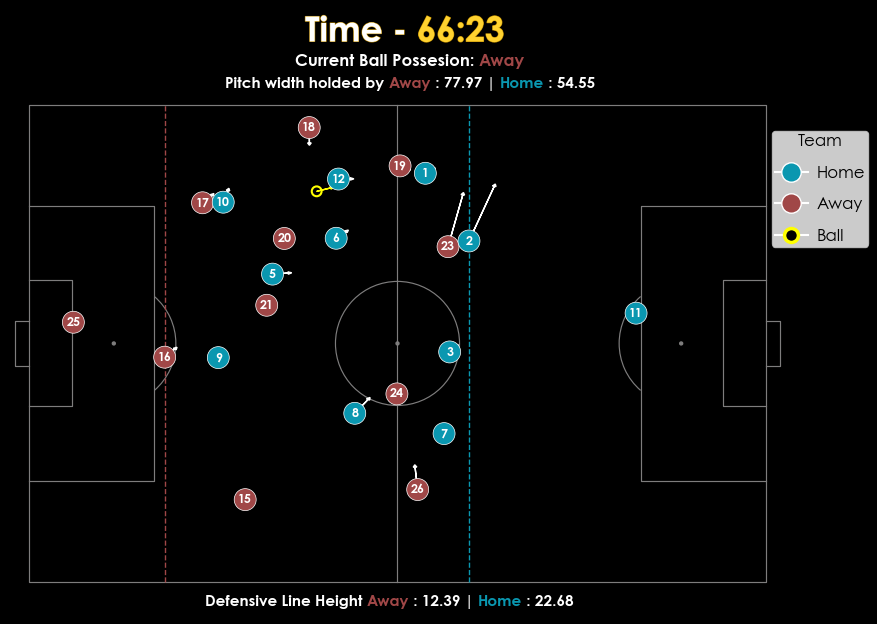

In [12]:
processor.plot_single_frame(tidy_data,99990,poss_data,method="base",text_font="Century Gothic",save=False)# Saved as frame_xxx.png in images folder

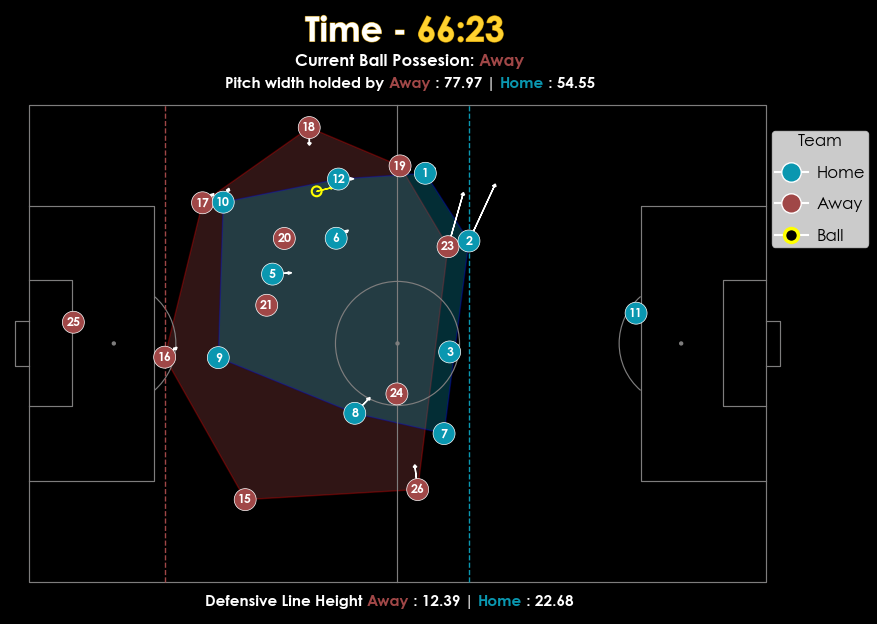

In [13]:
processor.plot_single_frame(tidy_data,99990,poss_data,method="convexhull",text_font="Century Gothic",save=False)# Saved as frame_xxx.png in images folder

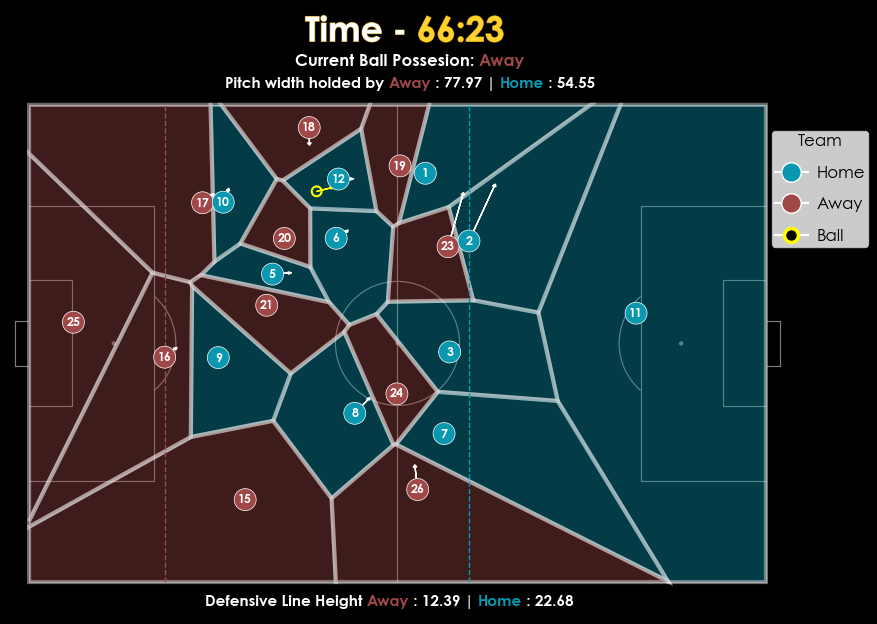

In [14]:
processor.plot_single_frame(tidy_data,99990,poss_data,method="voronoi",text_font="Century Gothic",save=False)# Saved as frame_xxx.png in images folder

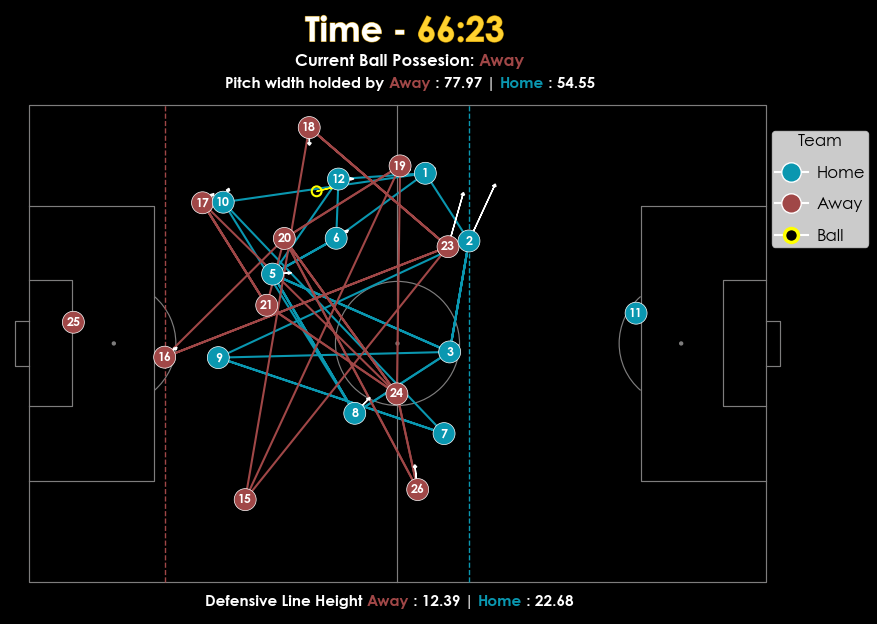

In [15]:
processor.plot_single_frame(tidy_data,99990,poss_data,method="delaunay",text_font="Century Gothic",save=False)# Saved as frame_xxx.png in images folder

### 4) 2D animation for a range of frames

In [16]:
# You need to create a folder to save the videos
import os

# Define the images folder
videos_folder = "videos"

# Check if the folder exists, if not, create it
os.makedirs(videos_folder, exist_ok=True)

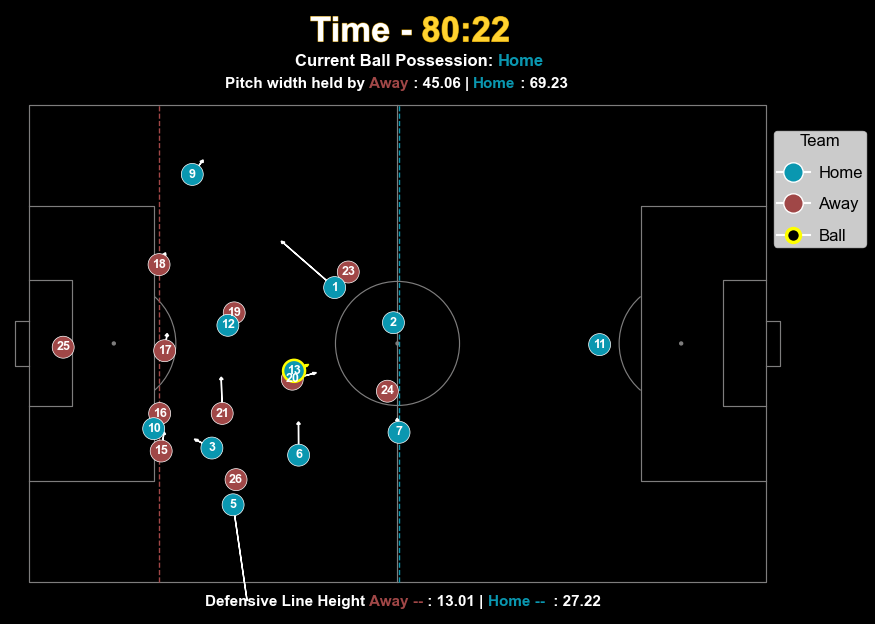

In [17]:
frame_start =120900
frame_end =120950

# On avg it takes 1 second to process 2-3 frames. So keep in mind to process 50-100 at once. 25 frames make up 1 second of video
processor.animate_frames(tidy_data,poss_data,frame_start,frame_end,mode='base',video_writer="gif",text_font="Arial",save=True) 

### 5) Team avg. positioning and stats by ON/OFF ball possession states

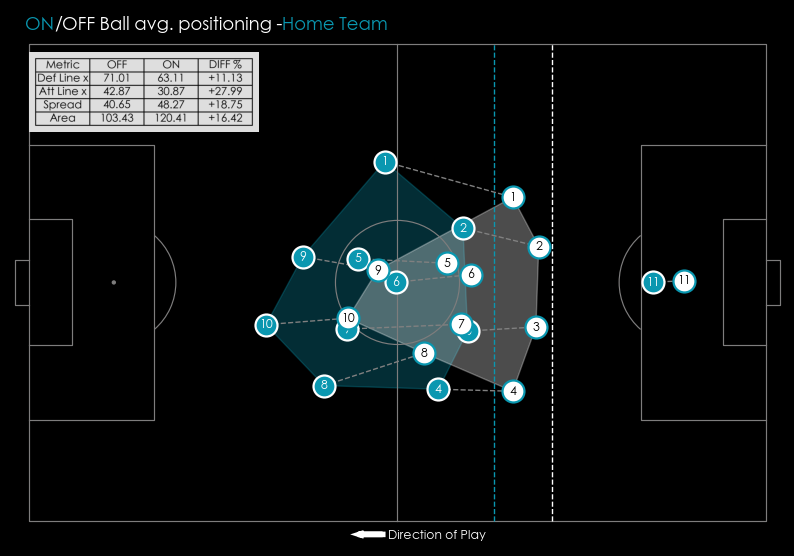

In [18]:
processor.plot_possession_metrica(tidy_data, poss_data, target_team ="home",save=True,text_font="STXihei") # saved as team_possession.png in images folder

### 6) Player heatmap by ON/OFF ball possession states

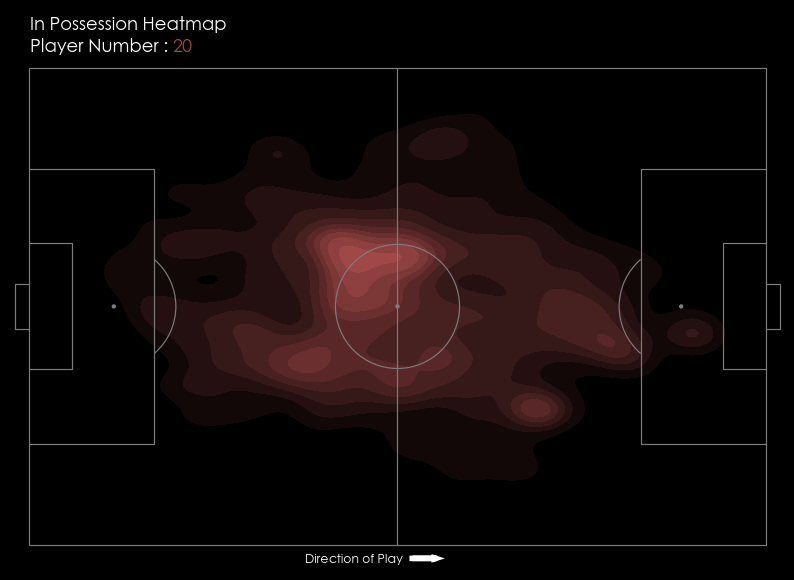

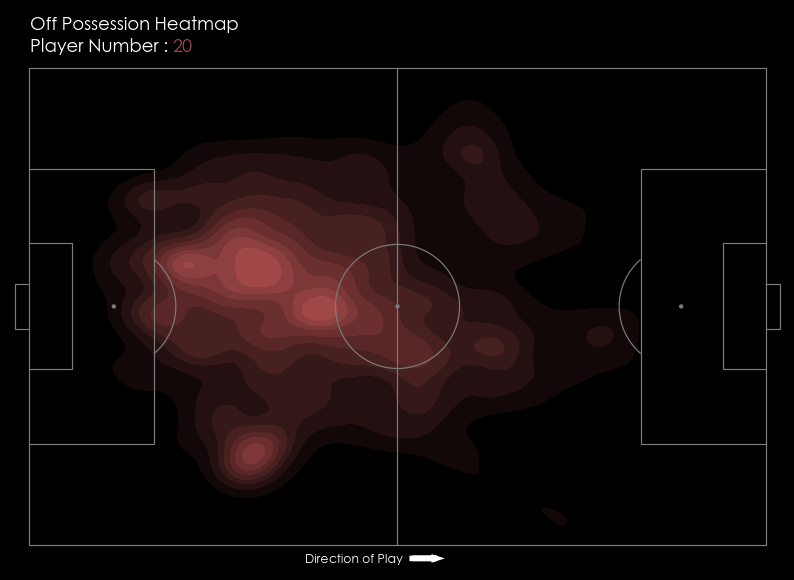

In [19]:
processor.player_heatmap_metrica(tidy_data, poss_data, target_team ="away",target_player= 20 ,text_font="STXihei")

## 7) Player movement stats calculation and visualization

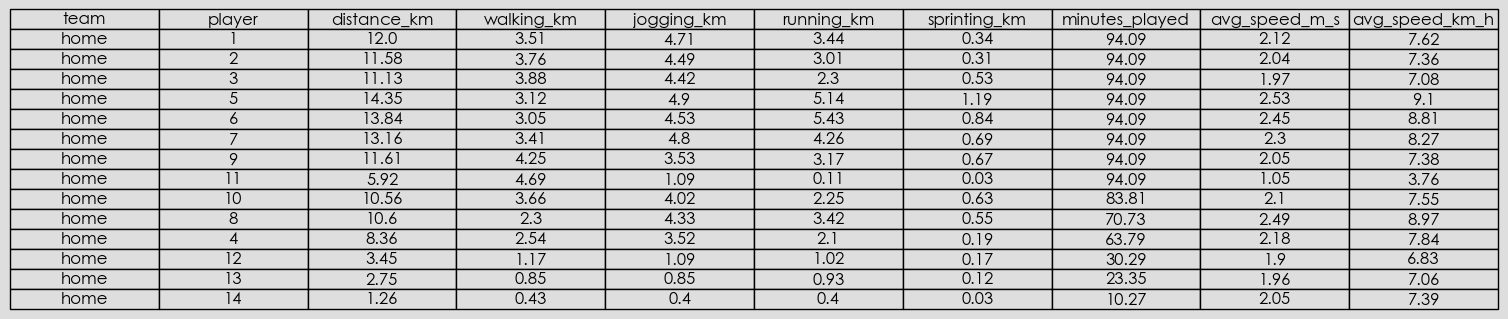

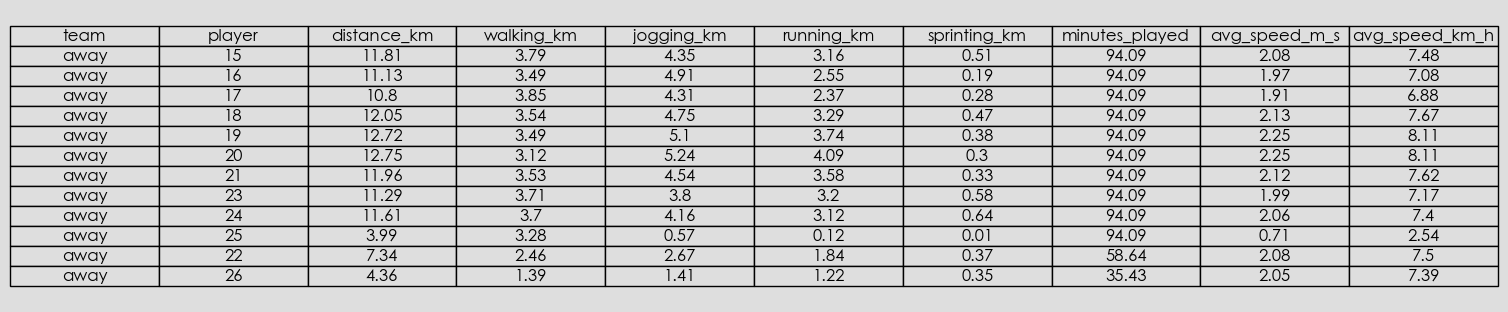

In [20]:
player_stats = processor.player_movement_stats_metrica(tidy_data,save= True,text_font="STXihei")

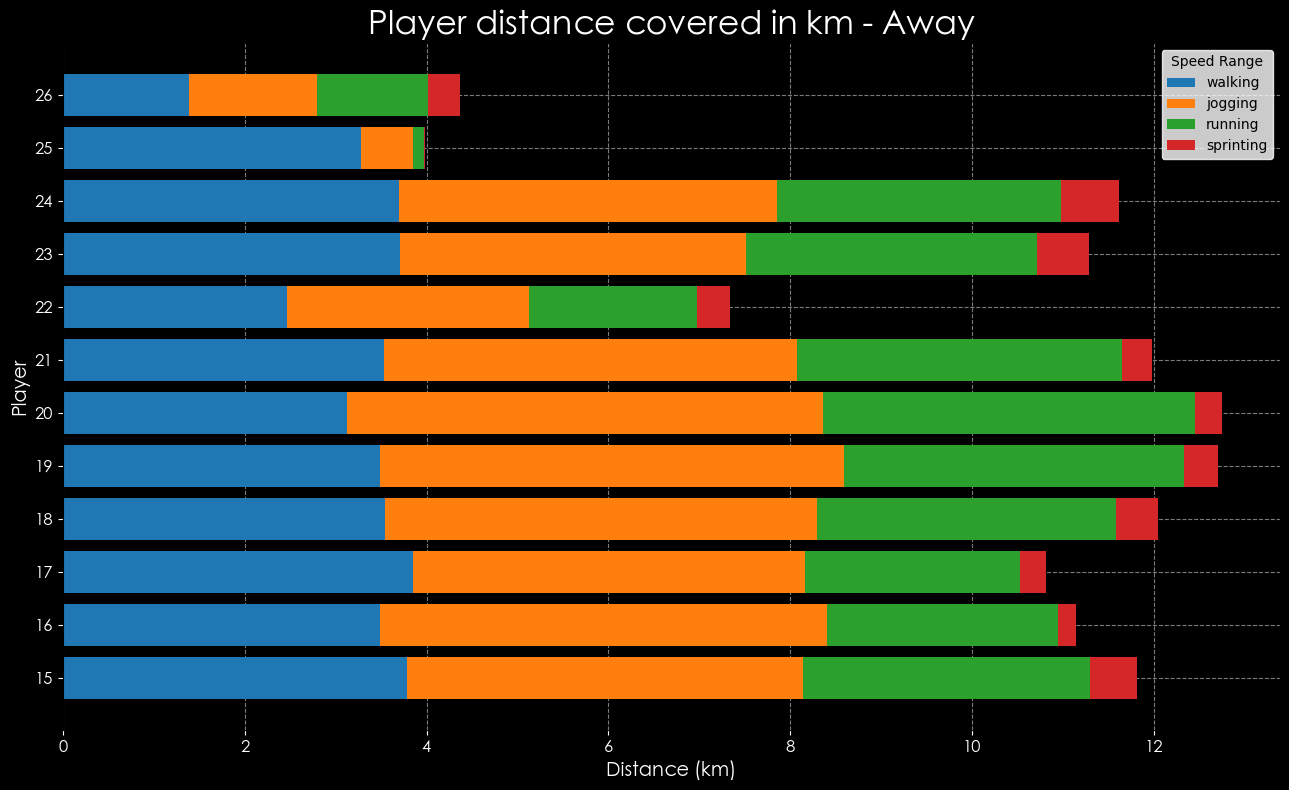

In [21]:
processor.player_stats_graph_metrica(player_stats,target_team = "away",save= True,text_font="STXihei")

### 8) Player Sprints Info and Vizualization

In [22]:
target_team= "home"

player_sprints,sprints_data = processor.sprints_info_metrica(tidy_data,target_team)

In [23]:
player_sprints

,player,no_of_sprints
4,5,46
5,6,40
8,9,27
7,8,26
9,10,26
6,7,21
2,3,20
0,1,16
1,2,9
11,12,8


In [24]:
sprints_data

,player,team,start,end,n,keep
0,1,home,1,0,12085,True
1,1,home,0,1,12112,True
2,1,home,1,0,19807,True
3,1,home,0,1,19847,True
4,1,home,1,0,38609,True
...,...,...,...,...,...,...
496,14,home,0,1,10077,True
497,14,home,1,0,10145,True
498,14,home,0,1,10176,True
499,14,home,1,0,10242,True


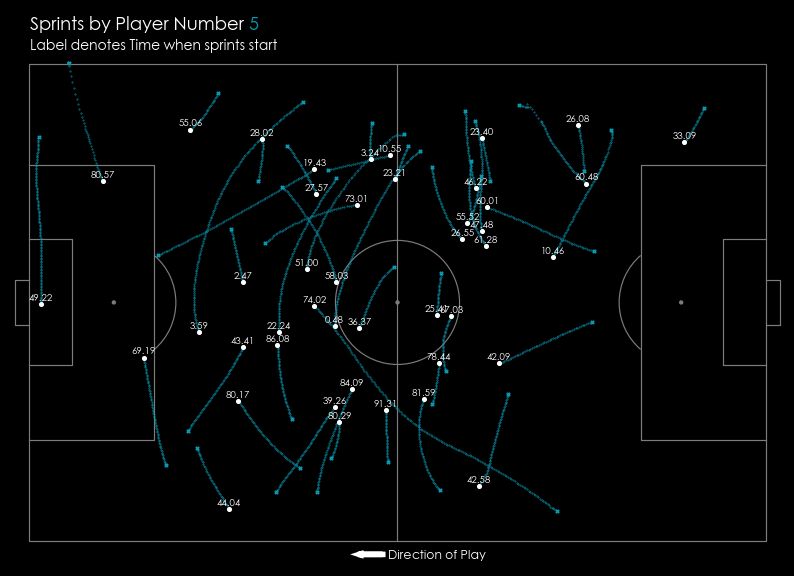

In [25]:
processor.plot_player_sprints_metrica(tidy_data,sprints_data,target_team = "home",target_player=5,save= True,text_font="STXihei")

### 9) Player animation highlighting a particular sprint

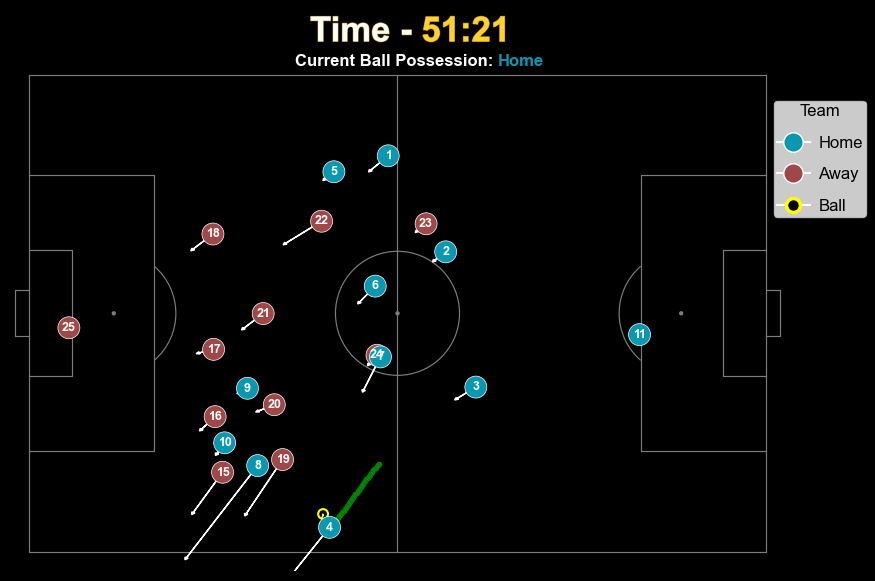

In [26]:


target_player = 4
player_df = sprints_data[sprints_data["player"] == target_player]
sprint_frames = [[player_df.iloc[i]["n"], player_df.iloc[i + 1]["n"]] for i in range(0, len(player_df), 2)]

# Sprint Number
sprint_no = 6
sprint_frame = sprint_frames[sprint_no]

frame_start = sprint_frame[0]
frame_end =sprint_frame[1]

# Saved as {target_player}_sprint_animation.gif in videos folder
processor.sprint_animate_metrica(tidy_data,poss_data,target_player,frame_start,frame_end,text_font="Arial",save=True,video_writer="gif") # saved as {target_player}_sprint_animation.gif in videos folder